**FACE MASK DETECTION IN FACIAL RECOGNIZATION**

The coursework content is Face mask detection in facial recognization. Here my added complexity is face mask segmentation. Face mask detection means we need to detect mask on the face in an image. Face mask segmentation means detecting the percent or position of mask covered on face in an image.

**DATASET**

 I have found the dataset from kaggle, with total of 440 images. Number of images with mask is 220 and images without mask is 220.

 **URL**  https://www.kaggle.com/dhruvmak/face-mask-detection

**Adding DataSet to Original DataSet**

As I am having balanced data set for with mask and without mask, so for applying Random Over Sampling I have added few images with without mask in without mask folder. And my data set does not contain train and test folders so I have created folders added 80% percent of data to train and remaining 20% data to test.

My new data set consists of train and test folders with mask and without mask data. The number of images available in train folder is with mask 230 images without mask and 220 images withmask, the number of images available in test folder is with mask 48 images and without mask 45 images.

Importing pacakages os and zipfile.

In [1]:
import os
import zipfile
from google.colab import drive

 Mounted Drive to google drive

In [2]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
df='/content/dataset.zip'
df1=zipfile.ZipFile(df, 'r')
df1.extractall('/content/dataset')

**Loading Of Image Data**

Importing nunnmpy and cv2 packages for data laoding.

In [4]:
import numpy as np
import cv2
import csv

Below is the code for Loading of image data(cleaning) by using some functions like resize, append and faltten by using a traget variable. And also saved original repository to drive.

In [5]:
resize_factor = 100 ## It will resize the images
path = '/content/dataset/dataset'
img = []
dr = []
ore = []
target = []
for root, dirs, files in os.walk(path):
     for file in files:
        with open(os.path.join(root, file), "r") as auto:
            try:
                img = cv2.imread(root+'/'+file, 0)
                img = cv2.resize(img, (resize_factor, resize_factor)) 
                dr.append(img)
                ore.append(img.flatten())
                target.append(root.replace(path,'').replace('\\',''))
            except Exception as e:
                print("Invalid file skipped.")
print("\nExample of Image Data")
print(img[:15])
ore = np.array(ore)
print("\nExample of Original repositary")
print(ore[:15])

#To save the data in csv file
with open('/content/original.csv', 'w', newline='', encoding='utf-8') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',')
    for i, pix in enumerate(ore):
        r = np.concatenate((pix,[target[i]]))
        filewriter.writerow(r)


Example of Image Data
[[143 145 146 ...  61  61  58]
 [143 145 142 ...  61  57  54]
 [143 145 148 ...  61  63  60]
 ...
 [154 157 158 ...  72  72  72]
 [156 159 161 ...  74  72  72]
 [156 159 162 ...  74  72  72]]

Example of Original repositary
[[157 145 144 ... 174 169 168]
 [ 41  41  44 ...  21  23  24]
 [ 13  14  11 ...  21  21  23]
 ...
 [247 247 247 ... 102  97  96]
 [ 70  72  68 ... 127 127 127]
 [135 136 137 ...   4   5  22]]


**Data Preprocessing**



**Binarization**

In below code we have converted image data to binarize data, whihc will be only two values max and min values of the image pixcles, and also I have saved the data in the binarized.csv file. Printed the sample bineraised data.

In [6]:
bin_thre = 180 
binrepo = []  
for root, dirs, files in os.walk(path):
     for file in files:
        with open(os.path.join(root, file), "r") as auto:
            try:
                img = cv2.imread(root+'/'+file, 0)
                img = cv2.resize(img, (resize_factor, resize_factor)) 
                _, img_bin = cv2.threshold(img, bin_thre, 255, 0) 
                binrepo.append(img_bin.flatten())
            except Exception as e:
                print("Invalid file skipped.")           
binrepo = np.array(binrepo)
print("\n Example of binarized repositary")
print(binrepo[:15])
with open('/content/binarised.csv', 'w', newline='', encoding='utf-8') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',')
    for i, l in enumerate(binrepo):
        row = np.concatenate((l,[target[i]]))
        filewriter.writerow(row)


 Example of binarized repositary
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [255 255 255 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


**HOG Feature Extraction**

Here I have applied the Histogram of Oriented Gradients (HOG) function descriptor for object detection in computer vision and image processing applications. It's a method for counting gradient orientation events in a particular area of an image or region of interest. After extracting the features of images, i have saved the data in hog.csv file. And also I have shown sample outputs.

In [7]:
class HOG:
    def __init__(self, orientations = 9, pixelsPerCell = (8, 8),
        cellsPerBlock = (3, 3), transform = False):
        self.orienations = orientations
        self.pixelsPerCell = pixelsPerCell
        self.cellsPerBlock = cellsPerBlock
        self.transform = transform
    def describe(self, image):
        hist = feature.hog(image, orientations = self.orienations,
            pixels_per_cell = self.pixelsPerCell,
            cells_per_block = self.cellsPerBlock,
            transform_sqrt = self.transform)
        return hist   
hog = HOG(orientations = 18, pixelsPerCell = (10, 10), cellsPerBlock = (1, 1), transform = True)
hogr = []
path='content/dataset/dataset'
for root, dirs, files in os.walk(path):
     for file in files:
        with open(os.path.join(root, file), "r") as auto:
            try:
                hogfeatures = hog.describe(img)
                hogr.append(hogfeatures)
            except Exception as e:
                print("Invalid file "+file+" skipped.")  
hogr = np.array(hogr)
print("Example of hog features")
print(hogr)
with open('/content/hog1.csv', 'w', newline='', encoding='utf-8') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',')
    for i, l in enumerate(hogr):
        row = np.concatenate((l,[target[i]]))
        filewriter.writerow(row)

Example of hog features
[]


**Random Over Sampling**

Importing the RandomOverSampler package, setting random_state of RandomOverSampler to zero.

In [8]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
hogrepo_ros, target_ros = ros.fit_resample(binrepo,target)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Count of images are displayed in the output before appling random over sampling. This shows us images are in random number we can bring it to constant after appling random over sampling. I will do in the next step. I have displayed it through table and bar garaph.


Calculating the distribution of classes...
                          Class  Number of Samples
0      /dataset1/test/with_mask                 48
1   /dataset1/test/without_mask                 45
2     /dataset1/train/with_mask                220
3  /dataset1/train/without_mask                230
Total images: 543

Showing class distribution bar chart...


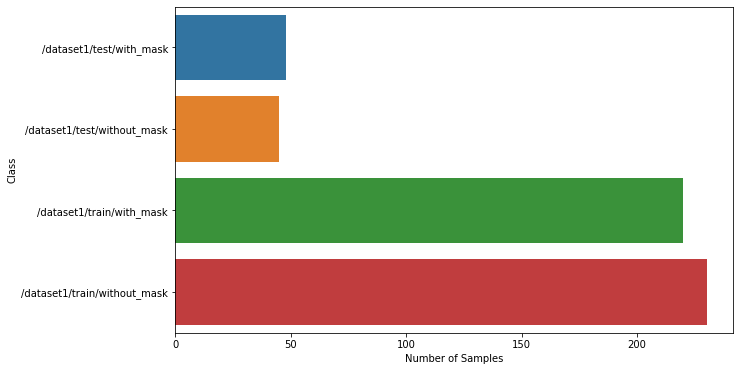

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print('\nCalculating the distribution of classes...')
hito = [['Class','Number of Samples']]
for i, lab1 in enumerate(sorted(list(set(target)))):
    count = 0
    for j, lab2 in enumerate(target):
        if lab1 == lab2:
            count+=1
    hito.append([lab1,count])
hito.append(['Total Samples', len(target)])
with open('/content/classdistribution.csv', 'w', newline='', encoding='utf-8') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',')
    for i, hstg in enumerate(hito):
        filewriter.writerow(hstg)
hito_panda = pd.DataFrame.from_records(hito[1:-1], columns=hito[0])
print(hito_panda)
print('Total images: '+str(len(target)))
sns_plot = sns.barplot(y="Class", x="Number of Samples", data=hito_panda)
sns_plot.figure.set_size_inches(10,6)
sns_plot.figure.savefig('barchart.jpg', orientation = 'landscape', dpi = 600, transparent=True)
print('\nShowing class distribution bar chart...')
plt.show()

Count of images are displayed after appling Random over sampling, I can observe that the count of images are same for each catogery(train and test). I have displayed it through table and bar garaph.



Calculating class distribution (after ROS)...
                          Class  Number of Samples
0      /dataset1/test/with_mask                230
1   /dataset1/test/without_mask                230
2     /dataset1/train/with_mask                230
3  /dataset1/train/without_mask                230
Total images: 920

Showing class distribution bar chart (after ros)...


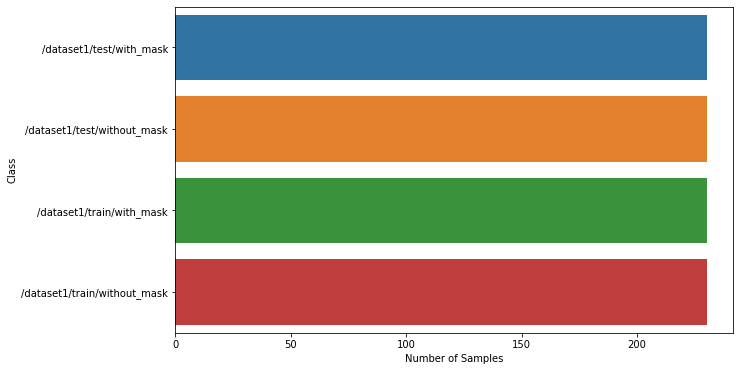

In [10]:
print('\nCalculating class distribution (after ROS)...')
hito = [['Class','Number of Samples']]
for i, lab1 in enumerate(sorted(list(set(target_ros)))):
    count = 0
    for j, lab2 in enumerate(target_ros):
        if lab1 == lab2:
            count+=1
    hito.append([lab1,count])
hito.append(['Total Samples', len(target_ros)])
with open('classdistribution_ros.csv', 'w', newline='', encoding='utf-8') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',')
    for i, hstg in enumerate(hito):
        filewriter.writerow(hstg)
hito_panda = pd.DataFrame.from_records(hito[1:-1], columns=hito[0])
print(hito_panda)
print('Total images: '+str(len(target_ros)))
sns_plot = sns.barplot(y="Class", x="Number of Samples", data=hito_panda)
sns_plot.figure.set_size_inches(10,6)
sns_plot.figure.savefig('barchart_ros.jpg', orientation = 'landscape', dpi = 600, transparent=True)
print('\nShowing class distribution bar chart (after ros)...')
plt.show()

**Data Validation and testing**

Concatnates various path components with exactly one directory and it creates a final path for a file or folder.


In [11]:
train_mask_dir=os.path.join('/content/dataset/dataset1/train/with_mask')
train_nonmask_dir=os.path.join('/content/dataset/dataset1/train/without_mask')
test_mask_dir=os.path.join('/content/dataset1/test/with_mask')
test_nonmask_dir=os.path.join('/content/dataset1/test/without_mask')

Importing matplot.pyplot to plot the graphs.

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

Parameters for our graph, we'll output images in a 4*4 configuration


In [13]:
nrows=4
ncols=4
pic_index=0
fig=plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index += 8
next_mask_pic = [os.path.join(train_mask_dir, fname)
                for fname in train_mask_dir[pic_index-8:pic_index]]
next_nonmask_pic = [os.path.join(train_nonmask_dir, fname)
                  for fname in train_nonmask_dir[pic_index-8:pic_index]]
next_mask_pic = [os.path.join(test_mask_dir, fname)
                for fname in test_mask_dir[pic_index-8:pic_index]]
next_nonmask_pic = [os.path.join(test_nonmask_dir, fname)
                    for fname in test_nonmask_dir[pic_index-8:pic_index]]

<Figure size 1152x1152 with 0 Axes>

**Convolutional Neural Network**

Importing tensorflow, sequential from keras.models and some properties from keras.layers to apply CNN model to find accuracy.

In [14]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [15]:
model = tf.keras.models.Sequential([
                                    #Note that input shape is the desired size of the image 300*300 with 3 byes of color
                                    #This is the first convolution
                                    tf.keras.layers.Conv2D(16, (3,3), activation='relu',input_shape=(300,300,3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    #This is the second convolution
                                    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    #This is the third covolution
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    #This is the fourth convolution
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    #This is the fifth convolution
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    #Flatten the results to feed into a DNN
                                    tf.keras.layers.Flatten(),
                                    #512 neuron hidden layer
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    #Only 1 output neuron. It will contain a value from 0-1 
                                    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()#Displaying the summary of the model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

Imported RMSprops to compile the model.

In [16]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

Here we are gerating the data from train and test folders, in the output we can see the number of images in train and test.

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1/255)
validation_datagen=ImageDataGenerator(rescale=1/255)
train_generator=train_datagen.flow_from_directory(
    '/content/dataset/dataset/dataset1/train',                    #This is a source directory for training images
    target_size=(300,300),                                #All images will be resized to 150*150
    batch_size=32,
    #Since we use binary_crossentropy we use bnary losses
    class_mode='binary'
)

validation_generator=validation_datagen.flow_from_directory(
    '/content/dataset/dataset/dataset1/test',                       #This is a source directory for testing images
    target_size=(300,300),                                  #All the images will be resized to 150*150
    batch_size=128,
    #Since we use binary_crossentropy we use binary losses
    class_mode='binary'
)

Found 450 images belonging to 2 classes.
Found 93 images belonging to 2 classes.


Generating train accuracy and test accuracy for 10 epochs

In [18]:
history=model.fit_generator(train_generator,steps_per_epoch=8,epochs=10,validation_data=validation_generator)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
8/8 [==============================] - 28s 3s/step - loss: 0.8959 - accuracy: 0.4472 - val_loss: 0.6921 - val_accuracy: 0.4946
Epoch 2/10
8/8 [==============================] - 24s 3s/step - loss: 0.6868 - accuracy: 0.5534 - val_loss: 0.6662 - val_accuracy: 0.6344
Epoch 3/10
8/8 [==============================] - 24s 3s/step - loss: 0.6680 - accuracy: 0.5845 - val_loss: 0.6578 - val_accuracy: 0.5269
Epoch 4/10
8/8 [==============================] - 24s 3s/step - loss: 0.7526 - accuracy: 0.6619 - val_loss: 0.5902 - val_accuracy: 0.6989
Epoch 5/10
8/8 [==============================] - 23s 3s/step - loss: 0.5105 - accuracy: 0.8159 - val_loss: 0.4281 - val_accuracy: 0.8280
Epoch 6/10
8/8 [==============================] - 26s 3s/step - loss: 0.3729 - accuracy: 0.8866 - val_loss: 0.4610 - val_accuracy: 0.8172
Epoch 7/10
8/8 [==============================] - 26s 3s/step - loss: 0.3252 - accuracy: 0.8927 - val_loss: 0.4014 - val_accuracy: 0.7957
Epoch 8/10
8/8 [==================

Below is the code to display graph for loss,accuracy of train and test data.

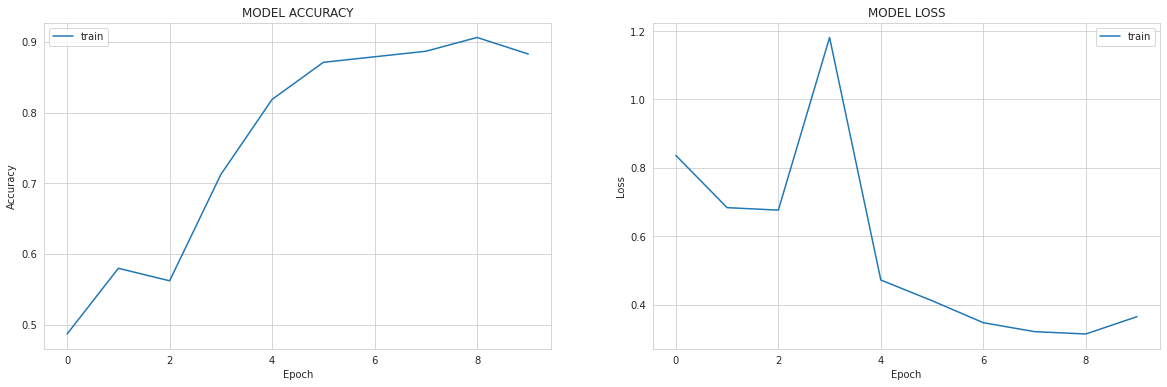

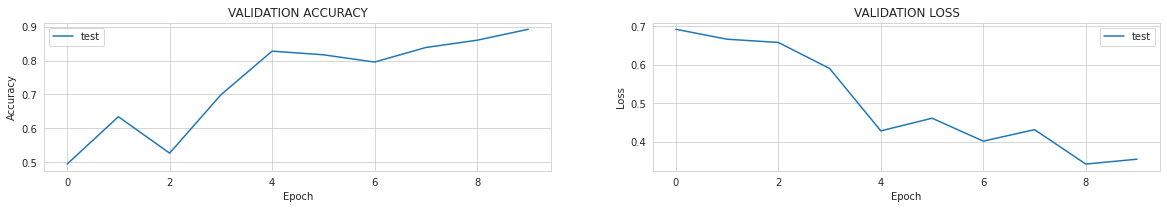

In [19]:
import seaborn as sns
sns.set_style('whitegrid')
fig, ax = plt.subplots()
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
fig.set_size_inches(20,6)
plt.title('MODEL ACCURACY')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train'], loc='upper left')
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
fig.set_size_inches(20,6)
plt.title('MODEL LOSS')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train'], loc='upper right')
sns.set_style('whitegrid')
fig, ax = plt.subplots()
fig.set_size_inches(20,6)
plt.subplot(2,2,1)
plt.plot(history.history['val_accuracy'])
plt.title('VALIDATION ACCURACY')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['test'], loc='upper left')
plt.subplot(2,2,2)
plt.plot(history.history['val_loss'])
fig.set_size_inches(20,6)
plt.title('VALIDATION LOSS')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['test'], loc='upper right')
plt.show()

Imported required libraries, and genated precsion, recall, f1-score and support foe the images.

In [20]:
import math
from sklearn.metrics import classification_report
validations_steps_per_epoch=np.math.ceil(validation_generator.samples/validation_generator.batch_size)
predictions=model.predict_generator(validation_generator,steps=validations_steps_per_epoch)
predicted_classes=np.argmax(predictions,axis=1)
true_classes=validation_generator.classes
class_labels=list(validation_generator.class_indices.keys())
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


              precision    recall  f1-score   support

   with_mask       0.52      1.00      0.68        48
without_mask       0.00      0.00      0.00        45

    accuracy                           0.52        93
   macro avg       0.26      0.50      0.34        93
weighted avg       0.27      0.52      0.35        93



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Importing the required libraries to check mask detection

In [21]:
from google.colab import files
from keras.preprocessing import image

Following is the code to upload the images to check the mask is present or not, in this model. We found better accuray with this model.

In [ ]:
uploaded=files.upload()

for fn in uploaded.keys():

  #Predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300,300))
  plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes=model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]<0.5:
    print(fn + "is mask")
  else:
    print(fn + "is without mask")

**VGG Model**

Imported VGG16 from tensorflow keras application.

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

Here I have applied base_model of vgg16

In [ ]:
base_model=VGG16(input_shape=(300,300,3),     #Shaoe of our images
                 include_top=False,           #Leave out the last fully connected layer
                 weights='imagenet')
for layer in base_model.layers:
  layer.trainable=False

Imported layers from keras

In [ ]:
from keras import layers

In [ ]:
#Flatten the output latyer to one dimension
x = layers.Flatten()(base_model.output)

#Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

#Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

#Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)
model=tf.keras.models.Model(base_model.input, x)
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001), loss='binary_crossentropy',metrics=['acc'])
history=model.fit(train_generator, validation_data=validation_generator,steps_per_epoch=8, epochs=10)

Ploted the accuracy and loss by using VGG model, accuracy is very good and loss is very less when compared to 

In [ ]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()
plt.subplot(1,2,1)
plt.plot(history.history['acc'])
fig.set_size_inches(20,6)
plt.title('MODEL ACCURACY')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train'], loc='upper left')
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
fig.set_size_inches(20,6)
plt.title('MODEL LOSS')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train'], loc='upper right')
sns.set_style('whitegrid')
fig, ax = plt.subplots()
fig.set_size_inches(20,6)
plt.subplot(2,2,1)
plt.plot(history.history['val_acc'])
plt.title('VALIDATION ACCURACY')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['test'], loc='upper left')
plt.subplot(2,2,2)
plt.plot(history.history['val_loss'])
fig.set_size_inches(20,6)
plt.title('VALIDATION LOSS')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['test'], loc='upper right')
plt.show()

In [ ]:
validations_steps_per_epoch=np.math.ceil(validation_generator.samples/validation_generator.batch_size)
predictions=model.predict_generator(validation_generator,steps=validations_steps_per_epoch)
predicted_classes=np.argmax(predictions,axis=1)
true_classes=validation_generator.classes
class_labels=list(validation_generator.class_indices.keys())
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

From the below output we can say that, accuarcy of this out is not good.

In [ ]:
uploaded=files.upload()

for fn in uploaded.keys():

  #Predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300,300))
  plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes=model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]<0.5:
    print(fn + "is mask")
  else:
    print(fn + "is without mask")

**InceptionV3 Model**

In [ ]:
Importing required libraries for InceptionV3 model

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.optimizers import RMSprop

Here we are applying IncpetionV3 model with 5 epochs to check the accuracy and lossof images. In this I have used activation.

In [ ]:
base_model=InceptionV3(input_shape=(300,300,3), include_top=False, weights='imagenet')
for layer in base_model.layers:
  layer.trainable=False
x=layers.Flatten()(base_model.output)
x=layers.Dense(1024,activation='relu')(x)
x=layers.Dropout(0.2)(x)
x=layers.Dense(1,activation='sigmoid')(x)
model=tf.keras.models.Model(base_model.input,x)
model.compile(optimizer=RMSprop(lr=0.0001), loss='binary_crossentropy',metrics=['acc'])
history=model.fit_generator(train_generator,validation_data=validation_generator,steps_per_epoch=8,epochs=5)

In [ ]:
import seaborn as sns
sns.set_style('whitegrid')
fig, ax = plt.subplots()
plt.subplot(1,2,1)
plt.plot(history.history['acc'])
fig.set_size_inches(20,6)
plt.title('MODEL ACCURACY')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train'], loc='upper left')
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
fig.set_size_inches(20,6)
plt.title('MODEL LOSS')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train'], loc='upper right')
sns.set_style('whitegrid')
fig, ax = plt.subplots()
fig.set_size_inches(20,6)
plt.subplot(2,2,1)
plt.plot(history.history['val_acc'])
plt.title('VALIDATION ACCURACY')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['test'], loc='upper left')
plt.subplot(2,2,2)
plt.plot(history.history['val_loss'])
fig.set_size_inches(20,6)
plt.title('VALIDATION LOSS')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['test'], loc='upper right')
plt.show()

In [ ]:
validations_steps_per_epoch=np.math.ceil(validation_generator.samples/validation_generator.batch_size)
predictions=model.predict_generator(validation_generator,steps=validations_steps_per_epoch)
predicted_classes=np.argmax(predictions,axis=1)
true_classes=validation_generator.classes
class_labels=list(validation_generator.class_indices.keys())
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

In [ ]:
uploaded=files.upload()

for fn in uploaded.keys():

  #Predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300,300))
  plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes=model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]<0.5:
    print(fn + "is mask")
  else:
    print(fn + "is without mask")

**ResNet50**

In [ ]:
from tensorflow.keras.applications import ResNet50

In [ ]:
base_model=ResNet50(input_shape=(300,300,3), include_top=False, weights='imagenet')
for layer in base_model.layers:
  layer.trainable=False
base_model=Sequential()
base_model.add(ResNet50(include_top=False, weights='imagenet', pooling='max'))
base_model.add(Dense(1, activation='sigmoid'))
base_model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.0001),loss='binary_crossentropy',metrics=['acc'])
history=base_model.fit(train_generator, validation_data=validation_generator, steps_per_epoch=5, epochs=5)

In [ ]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()
plt.subplot(1,2,1)
plt.plot(history.history['acc'])
fig.set_size_inches(20,6)
plt.title('MODEL ACCURACY')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train'], loc='upper left')
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
fig.set_size_inches(20,6)
plt.title('MODEL LOSS')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train'], loc='upper right')
sns.set_style('whitegrid')
fig, ax = plt.subplots()
fig.set_size_inches(20,6)
plt.subplot(2,2,1)
plt.plot(history.history['val_acc'])
plt.title('VALIDATION ACCURACY')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['test'], loc='upper left')
plt.subplot(2,2,2)
plt.plot(history.history['val_loss'])
fig.set_size_inches(20,6)
plt.title('VALIDATION LOSS')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['test'], loc='upper right')
plt.show()

In [ ]:
import numpy as np
import math
validations_steps_per_epoch=np.math.ceil(validation_generator.samples/validation_generator.batch_size)
predictions=base_model.predict_generator(validation_generator,steps=validations_steps_per_epoch)
predicted_classes=np.argmax(predictions,axis=1)
true_classes=validation_generator.classes
class_labels=list(validation_generator.class_indices.keys())
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

In [ ]:
uploaded=files.upload()

for fn in uploaded.keys():

  #Predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300,300))
  plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes=base_model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]<0.5:
    print(fn + "is mask")
  else:
    print(fn + "is without mask")